In [1]:
from WatershedSegmentation import *
from RegionGrowing import *
from skimage.segmentation import active_contour
from skimage.filters import gaussian

## ACTIVE CONTOURS

Active contour is a segmentation technique used to separate or segregate information from the required target region of an image. Moreover, one of the main and common algorithms of active contour is the **snake algorithm**. This algorithm works by minimizing the energy that is in part defined by the image and part by the spline’s shape.

On the other hand, the energy of the snake is defined as the sum of different energy integrals that are :
- Continuity
- Curvature 
- Gradient 

Continuity and curvature are defined as **internal energies** that control the smoothness and the length of the contour, by the parameters alpha and beta. Furthermore, the gradient is defined as the **external energy** that is the one responsible for the snake finding the edges of an object in the image.

These are the images that we are going to use along this part. First, we are going to compare img1 doing the snake algorithm and then we are going to compare it with img2 by doing the region growing and watershed algorithm.

Afterwards, we will compare the img3 that is a low resolution image with the three algorithms.

(Text(0.5, 1.0, 'Lung image'), (-0.5, 69.5, 46.5, -0.5))

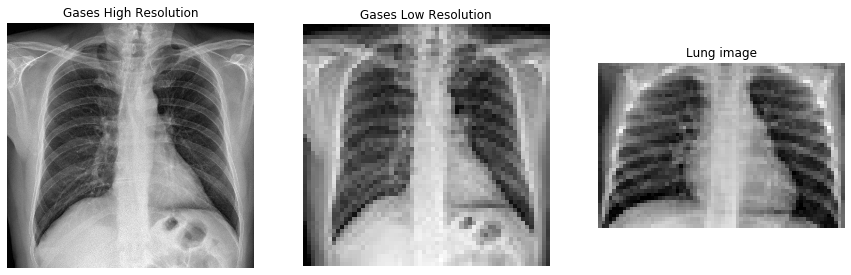

In [3]:
img1 = mpimg.imread('gases.jpeg') 
img1 = rgb2gray(img1)

img2 = mpimg.imread('gases_1.jpeg') 
img2 = rgb2gray(img2)

img3 = mpimg.imread('small_high_contrast.jpg') 
img3 = rgb2gray(img3)



plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(img1, cmap=plt.cm.gray)
plt.title('Gases High Resolution'), plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img2, cmap=plt.cm.gray)
plt.title('Gases Low Resolution'), plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(img3, cmap=plt.cm.gray)
plt.title('Lung image'), plt.axis('off')

Below we have the code that explain how the snake algorithm works.

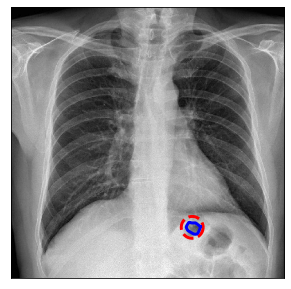

In [3]:
#Initiliaze spline:
s = np.linspace(0, 2*np.pi, 400) # It give us 400 values equally distributed from 0 to 2pi
# we use polar coordinates in order to have a better segmentation of our images
r = 1010+ 50*np.sin(s) # Coordinate r allows as to move fromm the upper part to the lower part
c = 830+ 50*np.cos(s) # Coordinate c allows us to move from left to right
# r and c correspond to the red circle

init = np.array([r, c]).T # It is an array of our corrdinates but transposed.
# The values for sin and cos allow us to make the circle more large or width. 


#Fit spline to image --> blue line
# we use first a gaussian filter in order to avoid the noise.
snake1 = active_contour(gaussian(img1, 0.3), 
                       init, alpha=0.3, beta=9, gamma=0.001) 
# As we said before:
# Alpha parameter can control the snake length shape. Higher values makes snake to contract faster.
# Beta parameter make the snake smoother.
# Gamma parameter is a explicit time stepping parameter.

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img1, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img1.shape[1], img1.shape[0], 0])
plt.show()

In order to compare this algorithm with the region growing we have troubles, It is because in region growing algorithm we have called a function inside the same function, so we have a **limit of iterations** and because we have chosen an image of high resolution the kernel dies, then we cannot work properly.

So that, we will compare the snake algorithm with the others but with the image of gases of low resolution.

The position of the seed number 0 is 48 40


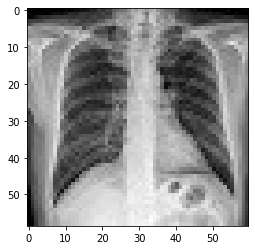

In [4]:
a1 = RegionGrowingP2(img2, 1,0.15)

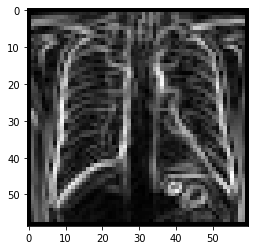

In [5]:
a2= WatershedExerciseP2(img2, 1) # It is the mask of our watershed algorithm

In [6]:
watershed_img = a2[3] # represents the watershed algorithm with local minima
watershed2_img = a2[4] # represents the watershed algorithm without local minima

(Text(0.5, 1.0, 'Watershed without local minima'), (-0.5, 59.5, 58.5, -0.5))

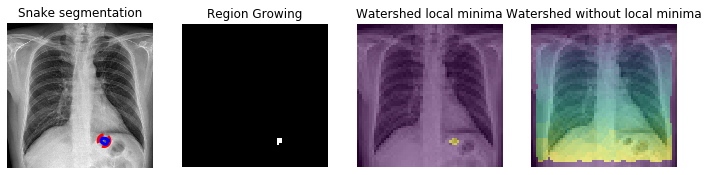

In [7]:
plt.figure(figsize=(12,7))
plt.subplot(1,4,1)
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.plot(snake1[:, 1], snake1[:, 0], '-b', lw=3)
plt.imshow(img1, cmap=plt.cm.gray)
plt.title('Snake segmentation'), plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(a1, cmap ="gray")
plt.title('Region Growing'), plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(img2, cmap ="gray")
plt.imshow(watershed_img, alpha=0.5)
plt.title('Watershed local minima'), plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img2, cmap ="gray")
plt.imshow(watershed2_img, alpha=0.5)
plt.title('Watershed without local minima'), plt.axis('off')

### Results

Being a high a resolution image we can see the difference in gradients, so we can easily check how our **snake curve** fully adapts to the region that we have decided to segment by modifying our parameters. 

In the second image, as we have reduced the resolution of the first one we can see that by **region growing** algorithm the region of interest, that is the gas, was segmented properly.

On the other hand, with the **minimum local watershed algorithm** we see that the point we have chosen becomes a local minimum, and we see how the surroundings are changed.

In the fourth image we cannot see the area of segmentation, but it is the expected result, since as we do not select local minimums the agorithm choose it randomly, so it flood more less the entire image.

In **conclusion**, if we have images of high resolution and to want to segment small regions the snake algorithm will be the best option. However, if the reduce the resolution the region growing and the watershed with local minima algorithms work well too.

Furthermore, we are going to compare how the three algorithms work with a low resolution image, and then compare the results.

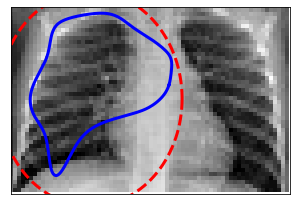

In [8]:
s = np.linspace(0, 2*np.pi, 400) 
r = 23+ 27*np.sin(s) 
c = 20+ 23*np.cos(s) 
init = np.array([r, c]).T 
snake2 = active_contour(gaussian(img3, 3), 
                       init, alpha=0.59, beta=7.7, gamma=0.01) 

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img3, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img3.shape[1], img3.shape[0], 0])
plt.show()

Now, we are going to select the region of interest by the region growing algorithm.

The position of the seed number 0 is 27 18


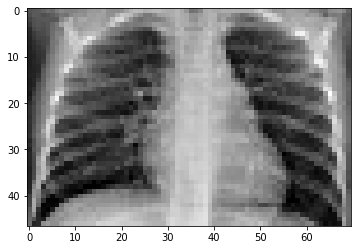

In [9]:
b1 = RegionGrowingP2(img3, 1,0.3)

We do the same as before but with the watershed algorithm.

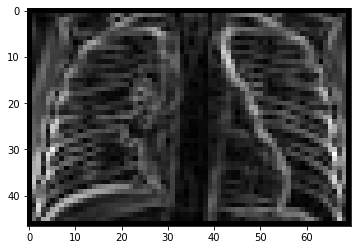

In [10]:
b2 = WatershedExerciseP2(img3, 1)

In [11]:
watershed_img = b2[3] # represents the watershed algorithm with local minima
watershed2_img = b2[4] # represents the watershed algorithm without local minima

(Text(0.5, 1.0, 'Watershed  without local minima'), (-0.5, 69.5, 46.5, -0.5))

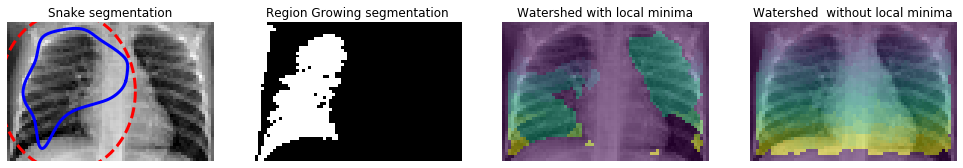

In [12]:
plt.figure(figsize=(17,7))

plt.subplot(1,4,1)
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.plot(snake2[:, 1], snake2[:, 0], '-b', lw=3)
plt.imshow(img3, cmap=plt.cm.gray)
plt.title('Snake segmentation'), plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(b1, cmap=plt.cm.gray)
plt.title('Region Growing segmentation'), plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img3, cmap ="gray")
plt.imshow(watershed_img, alpha=0.5)
plt.title('Watershed with local minima'), plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img3, cmap ="gray")
plt.imshow(watershed2_img, alpha=0.5)
plt.title('Watershed  without local minima'), plt.axis('off')

### Results

In this image we have decided to segment a lung, and since the region is so big and the image was of low resolution we can see how the **snake algorithm** is not very precise and takes part of the heart, that is, it does not adapt to the shape of the lung.

In this type of segmentation, the algorithms that best suit with our objective are, on the one hand **region growing**, where we can see that clicking on the area of the lung all the surrounding pixels become to the same color, these make the lung perfectly visible.

However, **watershed algorithm** also works with this type of image, but having the same contrast it segments the part that we have selected and the parts in which the contrast is similar. It would be better if we made two segmentations where we select the both lungs.

The image of **watershed without local minima** will be the worst option to make segmantation, just because as we said previously we do not select the minimums because it will be done by the algorithm, so it choose a lot of minimuns and flood to much part of the image.

In **conclusion**, the best type of segmentations in low resolution images are region growing and watershed with local minima, but they are not perfect anyway.

## References


https://www.intechopen.com/books/medical-and-biological-image-analysis/active-contour-based-segmentation-techniques-for-medical-image-analysis

https://scikit-image.org/docs/dev/auto_examples/edges/plot_active_contours.html

https://link.springer.com/chapter/10.1007/0-387-22746-6_12

https://web.mat.upc.edu/toni.susin/files/SnakesAivru86c.pdf

## Conclusion

Code has been done by three of us in different periodic meetings in which code has been created, improved, checked and modified. Regarding explanation of code and the creation of notebook Sandra is the person in charge of it.